## Analisis publicitario

Analizaremos en detalle los datos de las campañas, utilizando el evento "ad campaign hit"

### Carga de datos

In [60]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')
sns.set()

#Cargo el DataFrame
df = pd.read_csv('events.csv', low_memory = False, parse_dates = ['timestamp'], infer_datetime_format = True,
                    dtype = {'event': 'category','condition': 'category','storage': 'category', 'color': 'category', 'staticpage': 'category', 'campaign_source': 'category', 'search_engine': 'category', 'channel': 'category', 'new_vs_returning': 'category', 'region': 'category', 'country': 'category', 'device_type': 'category'})

### Evolución de las campañas a lo largo del tiempo

In [ ]:
Tomaremos las 5 campañas mas importantes y graficaremos su participiación durante el periodo.

[Text(0,0.5,'Hits'),
 Text(0.5,0,'Mes'),
 Text(0.5,1,'Evolución de las 5 mayores campañas publicitarias')]

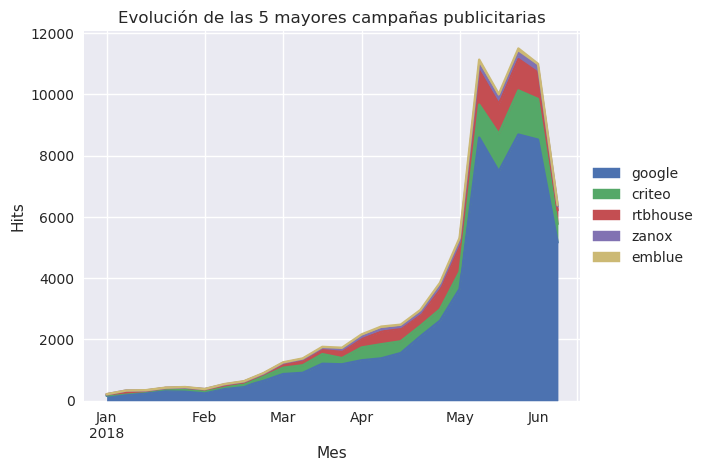

In [61]:
n = 5

hits_campanias = df.loc[(df['event']=='ad campaign hit'), ['timestamp', 'person', 'url', 'campaign_source']].copy()
hits_campanias['semana'] = hits_campanias['timestamp'].dt.week - 1
hits_campanias['semana'] = pd.to_datetime('2018', format='%Y') + pd.to_timedelta(hits_campanias['semana'].mul(7).astype('str') + ' days')
hits_campanias.dropna(subset = ['campaign_source'], inplace = True)

n_mayores_sources = hits_campanias['campaign_source'].value_counts().iloc[0:n]

hits_campanias = pd.crosstab(hits_campanias['semana'], hits_campanias['campaign_source'])
hits_campanias = hits_campanias.loc[:, n_mayores_sources.index]
# Porcentaje hits_campanias = hits_campanias.div(hits_campanias.sum(axis=1), axis=0).multiply(100)

ax = hits_campanias.plot(kind = 'area')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set(xlabel='Mes', ylabel='Hits', title = 'Evolución de las '+str(n)+' mayores campañas publicitarias')

## ¿Qué campañas tuvieron mayor y menor alcance?

Medimos el alcance de una campaña como la cantidad de usuarios únicos que dirigieron a la página.

In [67]:
ad_campaigns = df.loc[(df['event']=='ad campaign hit'),['person','campaign_source']].drop_duplicates()

### Mayor alcance

Text(0.5,0,'Cantidad de personas')

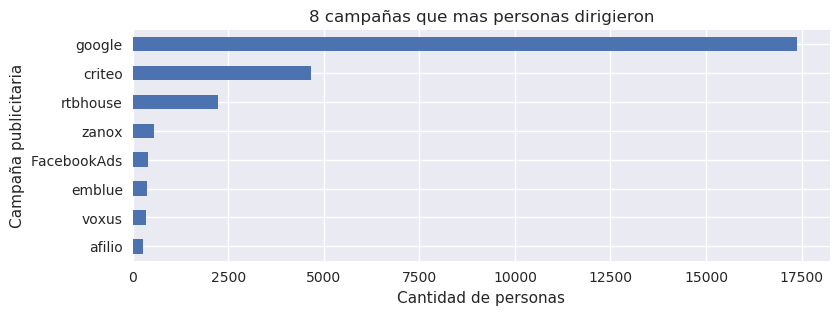

In [63]:
N = 8
ad_campaigns_gruped = ad_campaigns.groupby('campaign_source').agg({'person': 'count'})
g = ad_campaigns_gruped.sort_values(by="person",ascending=False).head(N).iloc[::-1]\
    .plot(kind="barh",figsize=(9,3),legend=False)
g.set_title(str(N)+' campañas que mas personas dirigieron')
g.set_ylabel('Campaña publicitaria')
g.set_xlabel('Cantidad de personas')

### Menor alcance

Text(0.5,0,'Cantidad de personas')

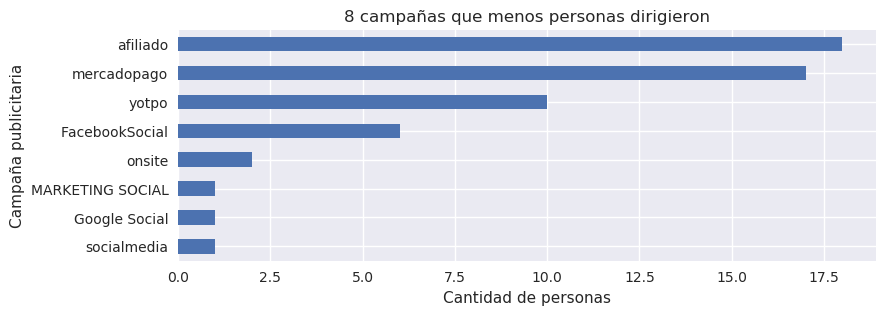

In [64]:
N = 8
g = ad_campaigns_gruped.sort_values(by="person",ascending=True).head(N)\
    .plot(kind="barh",figsize=(9,3),legend=False)
g.set_title(str(N)+' campañas que menos personas dirigieron')
g.set_ylabel('Campaña publicitaria')
g.set_xlabel('Cantidad de personas')

## ¿En qué cantidad de compras influyeron?


Text(0,0.5,'Campaña')

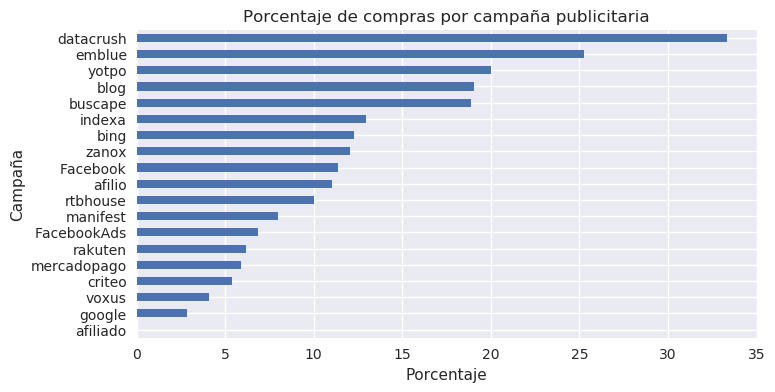

In [66]:
personas_que_compraron = df.loc[df['event']=='conversion',['person']].drop_duplicates()
personas_que_compraron["compro"] = True

ad_compras = ad_campaigns.set_index("person")\
    .join(personas_que_compraron.set_index("person"),on="person",how="left")
ad_compras["person"] = ad_compras.index
ad_compras = ad_compras.groupby(["campaign_source"]).agg({"person":"count","compro":"count"})
ad_compras['porcentaje'] = 100* (ad_compras['compro']/ad_compras['person'])
ad_compras = ad_compras.loc[ad_compras["person"] >= 10,["porcentaje"]].sort_values(by="porcentaje",ascending=False)
p = ad_compras.iloc[::-1].plot(kind="barh",legend=False,figsize=(8,4),title="Porcentaje de compras por campaña publicitaria")
p.set_xlabel("Porcentaje")
p.set_ylabel("Campaña")